### 목표 : 부족한 피쳐를 조합 생성하여 모델 성능 향상
- 특성공학 => 피쳐 추출/선택/생성
- 비선형의 데이터에 대한 피쳐 생성 ==> 곡선형태의 회귀선 수식
- 모듈 : sklearn.preprocessing내에 포함
- 데이터 : fish.csv
- 피쳐 : Perch의 Height, Length, Width
- 타겟 : Perch의 Weight
- 학습유형 : 지도학습

(1) 전처리 피쳐 조합 생성 살펴보기

In [32]:
# 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [33]:
# 인스턴스 생성
poly=PolynomialFeatures(include_bias=False)

In [34]:
poly.fit([[2,3]])

PolynomialFeatures(include_bias=False)

In [35]:
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [36]:
poly=PolynomialFeatures(include_bias=False, degree=5)
poly.fit([[2,3]])

PolynomialFeatures(degree=5, include_bias=False)

In [37]:
poly.transform([[2,3]])

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [38]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

(2) perch 데이터를 최대한 만족하는 회귀선을 찾기

(2-1) 모듈로딩 및 데이터 준비 <hr>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# 데이터 준비
data_file = '../data/fish.csv'
dataDF = pd.read_csv(data_file)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [41]:
dataDF.drop('Diagonal', axis='columns', inplace=True)

In [42]:
dataDF.head(2)

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.52,4.0200
1,Bream,290.0,26.3,12.48,4.3056


In [43]:
# Perch행만 추출
perchDF=dataDF[dataDF.Species == 'Perch']

In [44]:
# Perch행 삭제
perchDF = perchDF.drop('Species', axis='columns').copy()
perchDF.head(1)

,Weight,Length,Height,Width
72,5.9,8.4,2.112,1.408


In [45]:
# 행 인덱스 초기화
perchDF.reset_index(drop=True, inplace=True)
perchDF.head(2)

,Weight,Length,Height,Width
0,5.9,8.4,2.112,1.4080
1,32.0,13.7,3.528,1.9992


(2-2) 데이터 확인 <hr>
- 학습 유형 결정위한 단계
- 피쳐 스케일링 진행 여부 체크

In [46]:
# 피쳐와 타겟과의 관계 정도를 시각화 및 수치값으로 표기 및 출력
# 매개변수 : 행수, 열수, 타겟, 피쳐리스트, 상관계수값
# 반환 : 없음
def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target], df[features[idx]], label=f'corr:{corrs[idx]:.2}')
        plt.legend()
        plt.xlabel(target)
        plt.ylabel(features[idx])
    plt.tight_layout()
    plt.show()

In [47]:
corrList = perchDF.corr()['Weight'].to_list()
corrList[1:]

[0.9586558679968435, 0.9684406904743869, 0.9639433246031042]

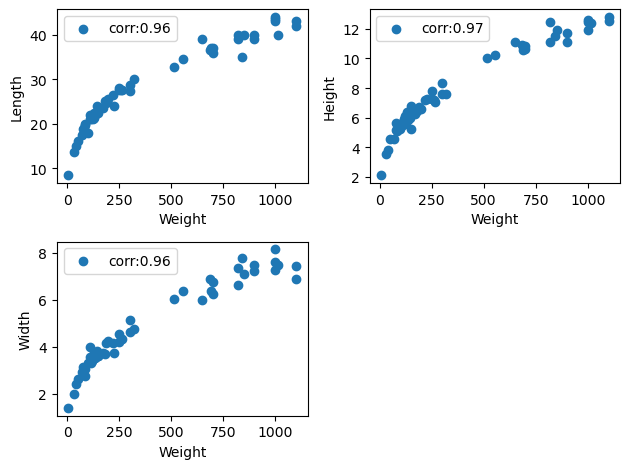

In [48]:
print_feature(2,2,perchDF, perchDF.columns[0], perchDF.columns[1:], corrList[1:])

(3) 학습 준비

(3-1) 학습 데이터 분리 => 피쳐-타겟, 학습용 데이터셋-테스트용 데이터셋

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
# 피쳐와 타겟 분리
featureDF=perchDF[perchDF.columns[1:]]
featureDF.head(2)

,Length,Height,Width
0,8.4,2.112,1.4080
1,13.7,3.528,1.9992


In [51]:
targetDF=perchDF[perchDF.columns[0]]
targetDF.head(2)

0     5.9
1    32.0
Name: Weight, dtype: float64

In [52]:
# 데이터셋 준비 => 70:30
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetDF, 
                                                    random_state=7, 
                                                    test_size=0.3)

In [53]:
print(f'[훈련용] X_train : {X_train.shape} y_train : {y_train.shape}')
print(f'[테스트용] X_test : {X_test.shape} y_test : {y_test.shape}')

[훈련용] X_train : (39, 3) y_train : (39,)
[테스트용] X_test : (17, 3) y_test : (17,)


In [54]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [55]:
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
poly_feature.fit(X_train)

PolynomialFeatures(include_bias=False)

In [62]:
pd.DataFrame(poly_feature.transform(X_train))

,0,1,2,3,4,5,6,7,8
0,43.0,11.9328,7.2772,1849.00,513.11040,312.91960,142.391716,86.837372,52.957640
1,26.5,7.1680,4.1440,702.25,189.95200,109.81600,51.380224,29.704192,17.172736
2,23.0,5.2185,3.6260,529.00,120.02550,83.39800,27.232742,18.922281,13.147876
3,36.5,10.8810,6.8640,1332.25,397.15650,250.53600,118.396161,74.687184,47.114496
4,28.0,7.8204,4.2042,784.00,218.97120,117.71760,61.158656,32.878526,17.675298
5,44.0,12.4888,7.5958,1936.00,549.50720,334.21520,155.970125,94.862427,57.696178
6,20.0,5.0820,2.7720,400.00,101.64000,55.44000,25.826724,14.087304,7.683984
7,27.3,8.3230,5.1373,745.29,227.21790,140.24829,69.272329,42.757748,26.391851
8,15.0,3.8240,2.4320,225.00,57.36000,36.48000,14.622976,9.299968,5.914624
9,30.0,7.6156,4.7716,900.00,228.46800,143.14800,57.997363,36.338597,22.768167


In [63]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

In [64]:
pd.DataFrame(poly_feature.transform(X_train),columns=poly_feature.get_feature_names_out())

,Length,Height,Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2
0,43.0,11.9328,7.2772,1849.00,513.11040,312.91960,142.391716,86.837372,52.957640
1,26.5,7.1680,4.1440,702.25,189.95200,109.81600,51.380224,29.704192,17.172736
2,23.0,5.2185,3.6260,529.00,120.02550,83.39800,27.232742,18.922281,13.147876
3,36.5,10.8810,6.8640,1332.25,397.15650,250.53600,118.396161,74.687184,47.114496
4,28.0,7.8204,4.2042,784.00,218.97120,117.71760,61.158656,32.878526,17.675298
5,44.0,12.4888,7.5958,1936.00,549.50720,334.21520,155.970125,94.862427,57.696178
6,20.0,5.0820,2.7720,400.00,101.64000,55.44000,25.826724,14.087304,7.683984
7,27.3,8.3230,5.1373,745.29,227.21790,140.24829,69.272329,42.757748,26.391851
8,15.0,3.8240,2.4320,225.00,57.36000,36.48000,14.622976,9.299968,5.914624
9,30.0,7.6156,4.7716,900.00,228.46800,143.14800,57.997363,36.338597,22.768167


In [ ]:
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

X_train_poly = poly_feature.transform(X_train)
X_test_poly = poly_feature.transform(X_test)

(4) 학습 진행

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_std, y_train)

print(f'[모델 파라미터] ====>\ncoef_: {model.coef_}\nmodel.intercept_: {model.intercept_}')

In [ ]:
# StandardScaler: 평균0, 편차1
def tt_std(X_train_std, y_train, X_test_std, y_test):
    train_score_std = model.score(X_train_std, y_train)
    test_score_std = model.score(X_test_std, y_test)
    
    print(f'Train Score std : {train_score_std} --- Test Score std : {test_score_std}')
    return train_score_std, test_score_std

In [ ]:
a,b= tt_std(X_train_std, y_train, X_test_std, y_test)